### House Price Prediction Exercise - data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

In [1]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model. Training data  'house100Data.csv'
# R^2 = 0.75  Price explained by the indep. variables
import Pkg; Pkg.add("DataFrames")
Pkg.add("Missings")
Pkg.add("Plots")
Pkg.add("CSV")
using DataFrames
using CSV
using Missings
using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


$$Y = X\beta + e $$

In [2]:
using DataFrames; 
data = CSV.read("house100Data.csv", DataFrame)
train = data[1:100,:]
size(train)

(100, 82)

In [5]:
# extract SalePrice column
price = train[1:100, :SalePrice]




100-element Vector{Int64}:
 208500
 181500
 223500
 140000
 250000
 143000
 307000
 200000
 129900
 118000
 129500
 345000
 144000
      ⋮
  85000
 123600
 109900
  98600
 163500
 133900
 204750
 185000
 214000
  94750
  83000
 128950

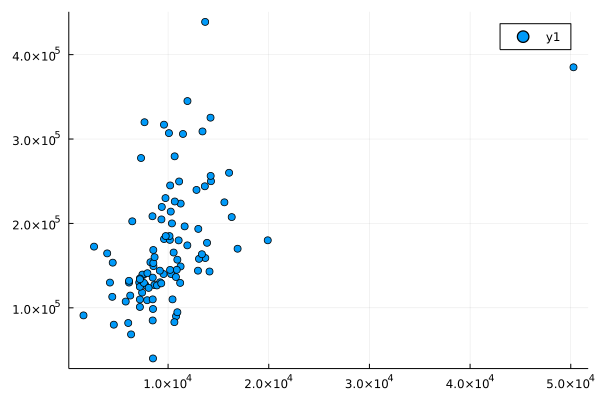

In [6]:
# plot on scatter plot
using Plots
# plot SalePrice vs id
#plot([1:100], price)
# scatter plot
scatter(train[:,:LotArea], price)
# bar plot
#bar([1:100], price)


In [8]:
# drop columns with missing values
# drop columns with missing values
#select!(train, Not(:Alley))   # this drops the Alley column
#shape of train
describe(train)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Column1,49.5,0,49.5,99,0,Int64
2,Id,50.5,1,50.5,100,0,Int64
3,MSSubClass,52.0,20,45.0,190,0,Int64
4,MSZoning,,C (all),,RM,0,String7
5,LotFrontage,71.407,21.0,70.0,122.0,14,"Union{Missing, Float64}"
6,LotArea,10115.9,1596,9595.5,50271,0,Int64
7,Street,,Grvl,,Pave,0,String7
8,Alley,,Grvl,,Pave,94,"Union{Missing, String7}"
9,LotShape,,IR1,,Reg,0,String3


In [ ]:
df2 = DataFrame(:A => [5, 10, 15, 20, 25], :Y => [5, 10, missing, 20, 15])

In [9]:
# count missing values in column 
function getListOfMissingColumns(df)
    missingColumns = []
    for i in 1:size(df)[2]
        num = count(ismissing, df[:,i])
        if num > 0
            # print column name and number of missing values
            println(names(df)[i], " ", num)
            push!(missingColumns, names(df)[i])
        end
    end
    return missingColumns
end
getListOfMissingColumns(train)
# drop columns with missing values




LotFrontage 14
Alley 94
BsmtQual 3
BsmtCond 3
BsmtExposure 3
BsmtFinType1 3
BsmtFinType2 3
FireplaceQu 54
GarageType 6
GarageYrBlt 6
GarageFinish 6
GarageQual 6
GarageCond 6
PoolQC 100
Fence 77
MiscFeature 91


16-element Vector{Any}:
 "LotFrontage"
 "Alley"
 "BsmtQual"
 "BsmtCond"
 "BsmtExposure"
 "BsmtFinType1"
 "BsmtFinType2"
 "FireplaceQu"
 "GarageType"
 "GarageYrBlt"
 "GarageFinish"
 "GarageQual"
 "GarageCond"
 "PoolQC"
 "Fence"
 "MiscFeature"

In [10]:
function dropColumnsWithMissingValues(df)
    missingColumns = getListOfMissingColumns(df)
    for i in 1:length(missingColumns)
        select!(df, Not(Symbol(missingColumns[i])))
    end
    return df
end
train = dropColumnsWithMissingValues(train)
size(train)

LotFrontage 14
Alley 94
BsmtQual 3
BsmtCond 3
BsmtExposure 3
BsmtFinType1 3
BsmtFinType2 3
FireplaceQu 54
GarageType 6
GarageYrBlt 6
GarageFinish 6
GarageQual 6
GarageCond 6
PoolQC 100
Fence 77
MiscFeature 91


(100, 66)

In [11]:
# get names of non numeric columns float and int

function getNonNumericColumns(df)
    nonNumericColumns = []
    for i in 1:size(df)[2]
        if !(eltype(df[:,i]) <: Number)
            push!(nonNumericColumns, names(df)[i])
        end
    end
    return nonNumericColumns
end
nonNumericCols = getNonNumericColumns(train)


29-element Vector{Any}:
 "MSZoning"
 "Street"
 "LotShape"
 "LandContour"
 "Utilities"
 "LotConfig"
 "LandSlope"
 "Neighborhood"
 "Condition1"
 "Condition2"
 "BldgType"
 "HouseStyle"
 "RoofStyle"
 ⋮
 "ExterQual"
 "ExterCond"
 "Foundation"
 "Heating"
 "HeatingQC"
 "CentralAir"
 "Electrical"
 "KitchenQual"
 "Functional"
 "PavedDrive"
 "SaleType"
 "SaleCondition"

In [12]:
# drop non numeric columns
function dropNonNumericColumns(df)
    nonNumericColumns = getNonNumericColumns(df)
    for i in 1:length(nonNumericColumns)
        select!(df, Not(Symbol(nonNumericColumns[i])))
    end
    return df
end
train = dropNonNumericColumns(train)
size(train)


(100, 37)

In [18]:
# get name of problem column as visbile in heatmap
drop = names(train)[33]
sum(train[:, 33])
select!(train, Not(Symbol(drop)))
size(train)

(100, 36)

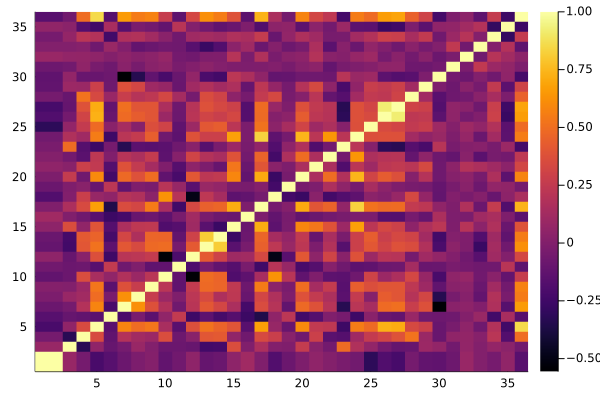

In [25]:
# Build correlation matrix
using Statistics
corMatrix = cor(Matrix(train))
# Plot heatmap of correlation matrix
heatmap(cor(Matrix(train)))

In [30]:
# select highest correlation with column 36
priceCor = corMatrix[:, 36]
# get index of the top 5 correlations
top5 = sortperm(priceCor, rev=true)[1:5]
# get column names of top 5 correlations
top5Names = names(train)[top5]





5-element Vector{Int64}:
 36
  5
 17
 27
 26

In [31]:
# select columns from list of column names
function selectColumns(df, colNames)
    X = []
    for i in eachindex(colNames)
        if i == 1
            X = df[:,Symbol(colNames[i])]
        else
            X = hcat(X, df[:,Symbol(colNames[i])])
        end
    end
    return X
end


Y = selectColumns(train, top5Names[1:1])
X = selectColumns(train, top5Names[2:4])

100×3 Matrix{Int64}:
 7  1710  548
 6  1262  460
 7  1786  608
 7  1717  642
 8  2198  836
 5  1362  480
 8  1694  636
 7  2090  484
 7  1774  468
 5  1077  205
 5  1040  384
 9  2324  736
 5   912  352
 ⋮        
 3  1526    0
 4   990    0
 4  1040  420
 5  1235  480
 5   964  432
 6  2291  506
 6  1786  684
 6  1470  420
 7  1588  472
 4   960  432
 5   835  366
 4  1225    0

In [34]:
# build linear regression model
using Statistics
using LinearAlgebra
function buildLinearRegressionModel(X, Y)
    # get number of rows
    m = size(X)[1]
    # add column of ones to X
    X = hcat(ones(m,1), X)
    # get theta
    theta = inv(X' * X) * X' * Y
    return theta
end
model = buildLinearRegressionModel(X, Y)



4-element Vector{Float64}:
 -71921.07185046899
  26000.678632845462
     44.373857401123715
     55.619140465393684

In [35]:
# predict price
function predictPrice(model, X)
    # get number of rows
    m = size(X)[1]
    # add column of ones to X
    X = hcat(ones(m,1), X)
    # get theta
    Y = X * model
    return Y
end
Yp = predictPrice(model, X)
# model accuracy R^2



100-element Vector{Float64}:
 216442.26371040652
 165667.61260090303
 223151.82530081554
 221981.07991596143
 280115.69720903377
 145216.7025174778
 246627.44498578866
 229744.70453304835
 214832.65934684695
 117274.88953017427
 125588.88294963815
 306145.56782788143
 118129.21670740173
      ⋮
  73795.47044218218
  76011.76150802535
 101590.49337354687
 139581.22262753508
 124886.18852949166
 213886.79232806741
 201378.20134333998
 172672.609321721
 206801.59843209953
  98708.01446704169
 115491.0976540307
  86439.6179972894

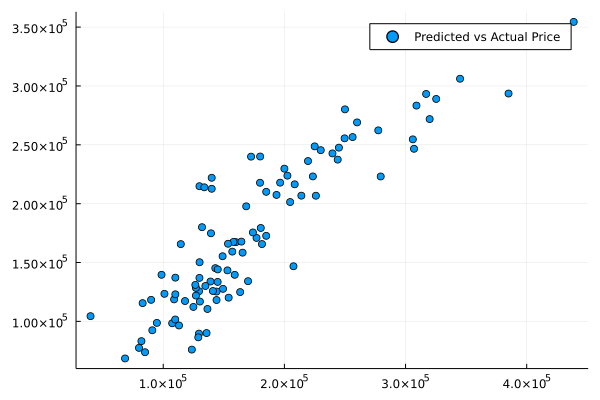

In [36]:
# plot predicted price vs actual price
scatter(Y, Yp, label="Predicted vs Actual Price")

In [37]:
# RMS difference between predicted and actual price
function getRMS(Y, Yp)
    # get number of rows
    m = size(Y)[1]
    # get difference
    diff = Y - Yp
    # get square of difference
    diffSq = diff .^ 2
    # get sum of square of difference
    sumDiffSq = sum(diffSq)
    # get mean of square of difference
    meanDiffSq = sumDiffSq / m
    # get root of mean of square of difference
    rms = sqrt(meanDiffSq)
    return rms
end
rms = getRMS(Y, Yp)




33002.969540841106

In [38]:
# get R^2 value. Metric to measure accuracy of model between 0 and 1
function getR2Accuracy(Y, Yp)
    # get number of rows
    m = size(Y)[1]
    # get mean of Y
    Ymean = mean(Y)
    # get sum of squared errors
    SSE = sum((Y - Yp).^2)
    # get sum of squared total
    SST = sum((Ymean .-Y).^2)  # note the dot operator and order of subtraction
    # get R^2
    R2 = 1 - SSE/SST
    return R2
end 
getR2Accuracy(Y, Yp)


0.789158151143107

In [ ]:
# selet numeric columns only
numericCols = [:LotArea, :OverallQual, :OverallCond, :YearBuilt, :YearRemodAdd, :MasVnrArea, :BsmtFinSF1, :BsmtFinSF2, :BsmtUnfSF, :TotalBsmtSF, :1stFlrSF, :2ndFlrSF, :LowQualFinSF, :GrLivArea, :BsmtFullBath, :BsmtHalfBath, :FullBath, :HalfBath, :BedroomAbvGr, :KitchenAbvGr, :TotRmsAbvGrd, :Fireplaces, :GarageYrBlt, :GarageCars, :GarageArea, :WoodDeckSF, :OpenPorchSF, :EnclosedPorch, :3SsnPorch, :ScreenPorch, :PoolArea, :MiscVal, :MoSold, :YrSold]


In [ ]:
# plot histogram of predicted price
using Plots
histogram(Yp, label="Predicted Price")


In [ ]:
# Problem Set
# 1. Build a linear regression model to predict the price of houses in the test.csv file
# 2. Submit your predictions 


test = CSV.read("test.csv", DataFrame)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.pairplot(numeric[cols], height=2.5)
plt.show()

In [ ]:
# usefule functions 
names(train)[33]
sum(train[:,33] )
# drop problem column
select!(train, Not(:PoolArea))
size(train)

In [ ]:
# get csv data from url
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = CSV.read(url, DataFrame)
